In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [14]:
train = pd.read_csv("train.tsv", sep = "\t")
test = pd.read_csv("test.tsv", sep = "\t")

In [15]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [16]:
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [17]:
test.columns

Index(['test_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'shipping', 'item_description'],
      dtype='object')

In [18]:
#Rearranging Columns
train = train[['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'shipping', 'item_description','price']]

In [19]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,shipping,item_description,price
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,1,No description yet,10.0
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,0,This keyboard is in great condition and works ...,52.0
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,1,Adorable top with a hint of lace and a key hol...,10.0
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,1,New with tags. Leather horses. Retail for [rm]...,35.0
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,0,Complete with certificate of authenticity,44.0


In [20]:
train.shape

(1482535, 8)

In [21]:
train.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
shipping                  0
item_description          4
price                     0
dtype: int64

In [23]:
train['category_name'].fillna(value='Not Available',inplace=True)
train['brand_name'].fillna(value='Not Available',inplace=True)

train.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
shipping             0
item_description     4
price                0
dtype: int64

In [25]:
#Drop rows which contain missing values
train.dropna(inplace=True)
train.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
shipping             0
item_description     0
price                0
dtype: int64

In [26]:
#how many classes of categorical data
train.nunique()

train_id             1482531
name                 1225270
item_condition_id          5
category_name           1288
brand_name              4810
shipping                   2
item_description     1281426
price                    828
dtype: int64

In [28]:
#Top 10 most common category names
train['category_name'].value_counts()[:10]

Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29909
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Women/Tops & Blouses/Tank, Cami                                20284
Women/Tops & Blouses/Blouse                                    20284
Name: category_name, dtype: int64

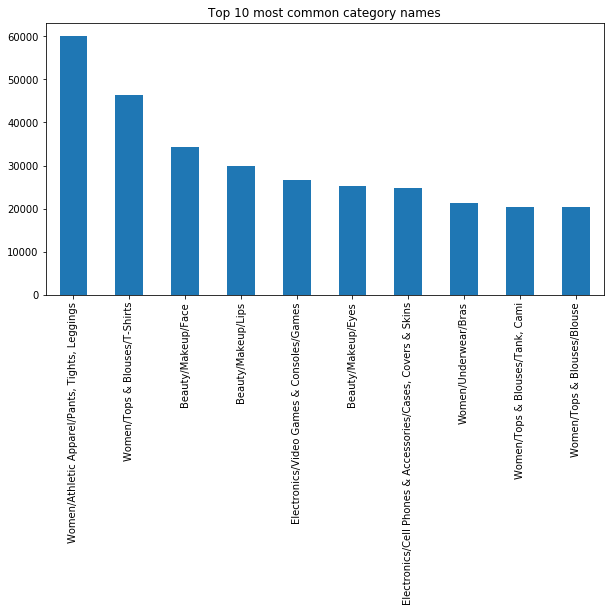

In [29]:
plt.title('Top 10 most common category names')
train['category_name'].value_counts()[:10].plot(kind='bar',figsize=(10,5))

In [30]:
#Top 10 most common brand names
train['brand_name'].value_counts()[:10]

Not Available        632679
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Apple                 17322
FOREVER 21            15186
Nintendo              15007
Lululemon             14558
Michael Kors          13928
Name: brand_name, dtype: int64

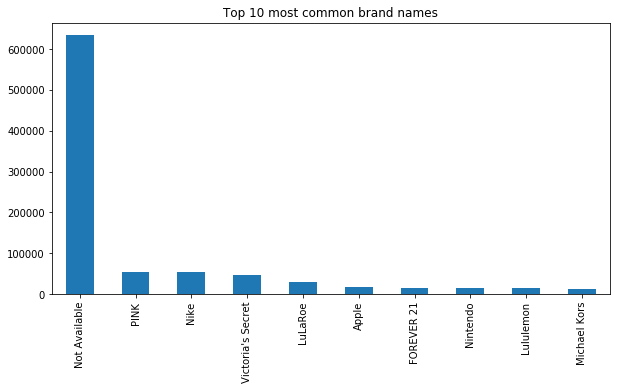

In [40]:
plt.title('Top 10 most common brand names')
train['brand_name'].value_counts()[:10].plot(kind='bar',figsize=(10,5))

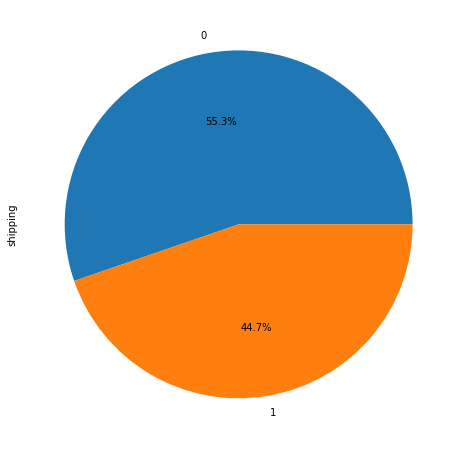

In [38]:
train['shipping'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))

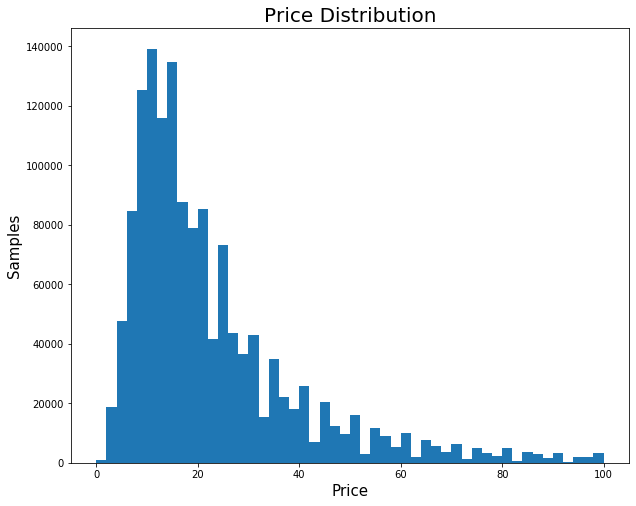

In [56]:
plt.figure(figsize=(10,8))
plt.hist(train['price'], bins = 50, range = [0, 100], label = "price")
plt.title("Price Distribution", fontsize = 20)
plt.xlabel("Price", fontsize = 15)
plt.ylabel("Samples", fontsize = 15)

plt.show()